In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Stain
data = pd.read_excel('dataset (multiaxial).xlsx') #Renishaw and EOS
data

,Loading Type,Build Orientation,Control Mode,σ_a (MPa),ε_a (%),Δε_p/2,τ_a (MPa),γ_a/2 (%),Surface τ_a (MPa),Surface γ_a (%),Surface dγ_p/2 (%),Surface σ_a (MPa),Surface ε_a (%),2Nf (Reversals)
0,A,V,Strain,775,1,0.348,-,-,-,-,-,775,1.000,2332
1,A,V,Strain,725,0.67,0.05,-,-,-,-,-,725,0.670,25232
2,A,V,Load,656,0.54,-,-,-,-,-,-,656,0.540,207274
3,A,V,Load,655,0.551,-,-,-,-,-,-,655,0.551,280296
4,A,V,Load,589,0.495,-,-,-,-,-,-,589,0.495,791938
5,A,V,Load,586,0.493,-,-,-,-,-,-,586,0.493,353404
6,A,45°,Strain,830,1,0.302,-,-,-,-,-,830,1.000,2170
7,A,45°,Strain,754,0.67,0.036,-,-,-,-,-,754,0.670,24768
8,A,45°,Load,653,0.549,-,-,-,-,-,-,653,0.549,142682
9,A,45°,Load,585,0.492,-,-,-,-,-,-,585,0.492,289734


In [3]:
# Filter data for Axial (A) and Torsion (T) with Build Orientation V
filtered_data = data[(data["Loading Type"].isin(["A", "T"])) & (data["Build Orientation"] == "V")]
filtered_data

,Loading Type,Build Orientation,Control Mode,σ_a (MPa),ε_a (%),Δε_p/2,τ_a (MPa),γ_a/2 (%),Surface τ_a (MPa),Surface γ_a (%),Surface dγ_p/2 (%),Surface σ_a (MPa),Surface ε_a (%),2Nf (Reversals)
0,A,V,Strain,775,1,0.348,-,-,-,-,-,775,1.000,2332
1,A,V,Strain,725,0.67,0.05,-,-,-,-,-,725,0.670,25232
2,A,V,Load,656,0.54,-,-,-,-,-,-,656,0.540,207274
3,A,V,Load,655,0.551,-,-,-,-,-,-,655,0.551,280296
4,A,V,Load,589,0.495,-,-,-,-,-,-,589,0.495,791938
5,A,V,Load,586,0.493,-,-,-,-,-,-,586,0.493,353404
11,T,V,Strain,-,-,-,481,0.785,487,2,0.934,844,1.237,2872
12,T,V,Strain,-,-,-,441,0.185,453,1.25,0.259,784,0.802,22686
13,T,V,Strain,-,-,-,400,0.119,418,1.08,0.166,723,0.714,137362
14,T,V,Load,-,-,-,322,-,348,0.76,-,603,0.511,10000000


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


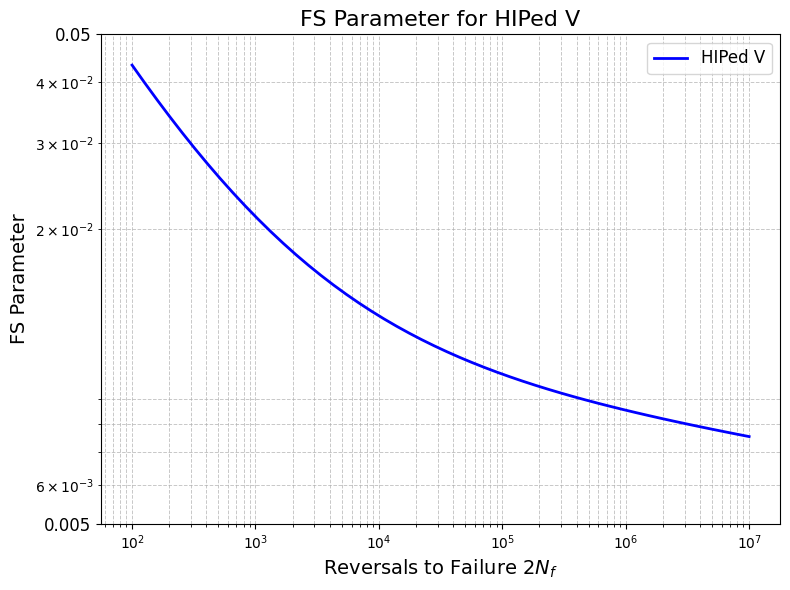

In [4]:
# Properties (Machined Surface)
# Given material properties for HIPed V
G               = 45.7 * 1e3    # Shear modulus in MPa (converted from GPa)
sigma_y         = 886           # Yield strength in MPa
tau_f_prime     = 683           # Shear fatigue strength coefficient in MPa
b0              = -0.0417       # Shear fatigue strength exponent
gamma_f_prime   = 0.4           # Shear fatigue ductility coefficient
c0              = -0.481        # Shear fatigue ductility exponent
k               = 0.3           # Material constant
delta_gamma_max = 1             # Assumed normalized value for simplicity
sigma_n_max     = sigma_y       # Max normal stress equals yield strength


# Define a range for 2Nf (Reversals to failure) in log scale
Nf_range = np.logspace(2, 7, num=50)  # 50 points between 10^2 and 10^7

# Calculate FS parameter using the formula
FS_values = (tau_f_prime / G) * (2 * Nf_range) ** b0 + gamma_f_prime * (2 * Nf_range) ** c0

# Prepare the data for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(Nf_range, FS_values, label="HIPed V", color="blue", linewidth=2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Reversals to Failure $2N_f$", fontsize=14)
plt.ylabel("FS Parameter", fontsize=14)
plt.title("FS Parameter for HIPed V", fontsize=16)
plt.yticks([0.005, 0.05], labels=["0.005", "0.05"], fontsize=12)
plt.grid(which="both", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\azl0082\AppData\Local\Temp\ipykernel_44708\116591975.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 800)


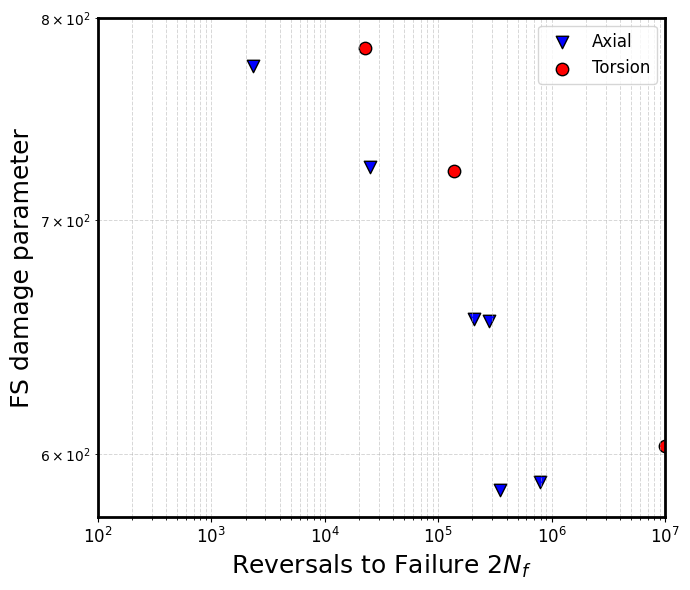

In [5]:
# Refined plot with improved formatting to match the example figure
plt.figure(figsize=(7, 6))

# Define marker styles and colors for Axial and Torsion
for loading_type, marker, color in zip(["A", "T"], ["v", "o"], ["blue", "red"]):
    subset = filtered_data[filtered_data["Loading Type"] == loading_type]
    plt.scatter(
        subset["2Nf (Reversals)"],
        subset["Surface σ_a (MPa)"],
        label=f"{'Axial' if loading_type == 'A' else 'Torsion'}",
        marker=marker,
        color=color,
        s=80,  # Marker size
        edgecolors="black"  # Marker edge color
    )


# Log scale for the x-axis
plt.xscale("log")
plt.yscale("log")

# Axis labels and title
plt.xlabel("Reversals to Failure $2N_f$", fontsize=18)
plt.ylabel("FS damage parameter", fontsize=18)

ax = plt.gca()  # Get current Axes
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Gridlines
plt.grid(which="both", linestyle="--", linewidth=0.7, alpha=0.5)

# Legend
plt.legend(fontsize=12, loc="best")

# Adjust axis limits to align with the example figure
plt.xlim(1e2, 1e7)
plt.ylim(0, 800)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve overall aesthetics
plt.tight_layout()
plt.show()

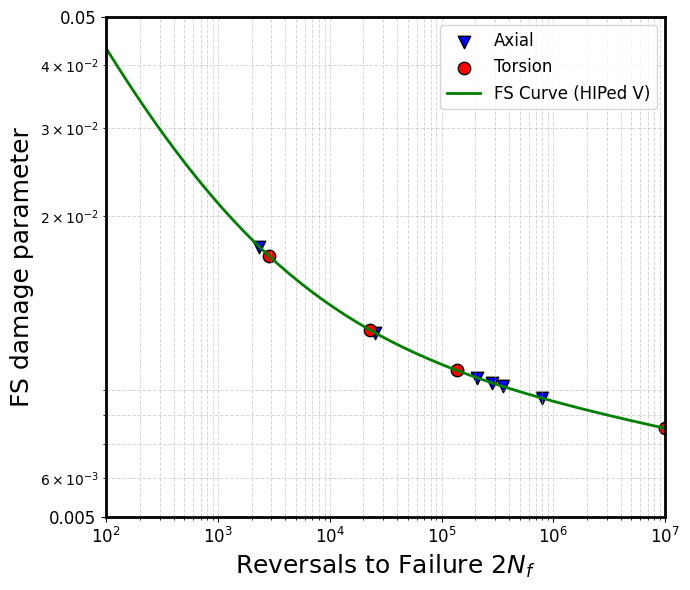

In [6]:
# Create a copy of the filtered data to avoid SettingWithCopyWarning
filtered_data_copy = filtered_data.copy()

# Recalculate FS parameters for both Axial and Torsion
filtered_data_copy["FS Parameter"] = np.nan
filtered_data_copy.loc[filtered_data_copy["Loading Type"] == "A", "FS Parameter"] = (
    tau_f_prime / G * (2 * filtered_data_copy["2Nf (Reversals)"]) ** b0 +
    gamma_f_prime * (2 * filtered_data_copy["2Nf (Reversals)"]) ** c0
)
filtered_data_copy.loc[filtered_data_copy["Loading Type"] == "T", "FS Parameter"] = (
    tau_f_prime / G * (2 * filtered_data_copy["2Nf (Reversals)"]) ** b0 +
    gamma_f_prime * (2 * filtered_data_copy["2Nf (Reversals)"]) ** c0
)

# Refined plot with updated y-axis ticks to show only 0.005 and 0.05
plt.figure(figsize=(7, 6))

# Define marker styles and colors for Axial and Torsion
for loading_type, marker, color in zip(["A", "T"], ["v", "o"], ["blue", "red"]):
    subset = filtered_data_copy[filtered_data_copy["Loading Type"] == loading_type]
    plt.scatter(
        subset["2Nf (Reversals)"],
        subset["FS Parameter"],
        label=f"{'Axial' if loading_type == 'A' else 'Torsion'}",
        marker=marker,
        color=color,
        s=80,  # Marker size
        edgecolors="black"  # Marker edge color
    )

# Plot the FS curve for HIPed V
plt.plot(Nf_range, FS_values, label="FS Curve (HIPed V)", color="green", linewidth=2)

# Log scale for the x-axis
plt.xscale("log")
plt.yscale("log")

# Axis labels and title
plt.xlabel("Reversals to Failure $2N_f$", fontsize=18)
plt.ylabel("FS damage parameter", fontsize=18)

ax = plt.gca()  # Get current Axes
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Gridlines
plt.grid(which="both", linestyle="--", linewidth=0.7, alpha=0.5)

# Legend
plt.legend(fontsize=12, loc="best")

# Adjust axis limits and customize y-ticks to show only 0.005 and 0.05
plt.xlim(1e2, 1e7)
#plt.ylim(0.005, 0.05)
plt.yticks([0.005, 0.05], labels=["0.005", "0.05"], fontsize=12)
plt.xticks(fontsize=12)

# Improve overall aesthetics
plt.tight_layout()
plt.show()
